# **Fundamentals of Machine Learning**
# *Final Project: Seoul Bike Rental*

## General purpose libraries call

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [50]:
# Reading csv file
SeoulBikeData = pd.read_csv('./SeoulBikeData.csv', encoding='latin-1')

## Initial dataset summary

In [51]:
# Printing basic data info
SeoulBikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

We can see a total of 8760 data points with 13 features and 1 target value. The features contain object, int64 and float64 datatypes, while the target (Rented Bike Count) is an int64.

In [52]:
# Dataframe top rows
SeoulBikeData.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Now we can have a better idea of what is the initial state of our dataset by showing some sample rows. We infer that we will need to transform object datatype features and normalize values.

## Initial dataset transformations

To structurate our dataset and improve the readness we can arrange the columns as:
1. Discrete variables (Date, Hour, Seasons, Holiday, Functioning Day): Those that have predifined categories for each possible value.
2. Continuous variables (Temperature(°C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm)): Those having inifinite possible values
3. Target value (Rented Bike Count): The value for the model to predict

In [53]:
# Rearranging the dataset
SeoulBikeData  = SeoulBikeData[['Date',
                                'Hour',
                                'Seasons',
                                'Holiday',
                                'Functioning Day',
                                'Temperature(°C)',
                                'Humidity(%)',
                                'Wind speed (m/s)',
                                'Visibility (10m)',
                                'Dew point temperature(°C)',
                                'Solar Radiation (MJ/m2)',
                                'Rainfall(mm)',
                                'Snowfall (cm)',
                                'Rented Bike Count']]

As mentioned before, to have only numerical values in the dataset features, we should apply some transformations

In [54]:
# Factorizing object datatype columns: Seasons, Holiday, Fuctioning Day
SeoulBikeData[['Seasons', 'Holiday', 'Functioning Day']] = SeoulBikeData[['Seasons', 'Holiday', 'Functioning Day']].apply(lambda x: pd.factorize(x)[0])

# Transforming Date string to datetime datatype
SeoulBikeData['Date'] = pd.to_datetime(SeoulBikeData['Date'], format='%d/%m/%Y')

From previous tests, we consider cleaner and more informative to extract from date feature the month and week day. 

In [55]:
# Obtaining month and day of the week for each date
SeoulBikeData['Month'] = (SeoulBikeData['Date'].dt.strftime('%m')).astype(int)
SeoulBikeData['Week Day'] = pd.factorize(SeoulBikeData['Date'].dt.day_name())[0]

# Inserting new columns in correct order
SeoulBikeData.insert(1, 'Month', SeoulBikeData.pop('Month'))
SeoulBikeData.insert(2, 'Week Day', SeoulBikeData.pop('Week Day'))

## General dataset exploration

In [56]:
SeoulBikeData.describe()

,Date,Month,Week Day,Hour,Seasons,Holiday,Functioning Day,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,6.526027,2.991781,11.500000,1.504110,0.049315,0.033676,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,704.602055
min,2017-12-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000
25%,2018-03-02 00:00:00,4.000000,1.000000,5.750000,1.000000,0.000000,0.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,191.000000
50%,2018-06-01 00:00:00,7.000000,3.000000,11.500000,2.000000,0.000000,0.000000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,504.500000
75%,2018-08-31 00:00:00,10.000000,5.000000,17.250000,2.000000,0.000000,0.000000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,1065.250000
max,2018-11-30 00:00:00,12.000000,6.000000,23.000000,3.000000,1.000000,1.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,3556.000000
std,NaN,3.448048,2.003519,6.922582,1.114408,0.216537,0.180404,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,644.997468


Now we reached an uniform dataset concerning datatypes. We can see all our features being numericals variables.
We also do observe some general statistics per feature. Taking a quick look at the information, it seems that some of them (Holiday, Functioning Day, Wind speed (m/s), Dew point temperature (°C), Rainfall(mm), Snowfall (cm), Rented Bike Count) are not balanced. This is known by looking at minimum and maximum value, as well as the 50% quartile marker; if the 50% marker is not close to the average between the minimum and maximum, we could be having unbalanced features. We can assure our suspicions checking the mean value if it is much closer to one of the minimum or maximum values. Probably there will be a need to balance the features.

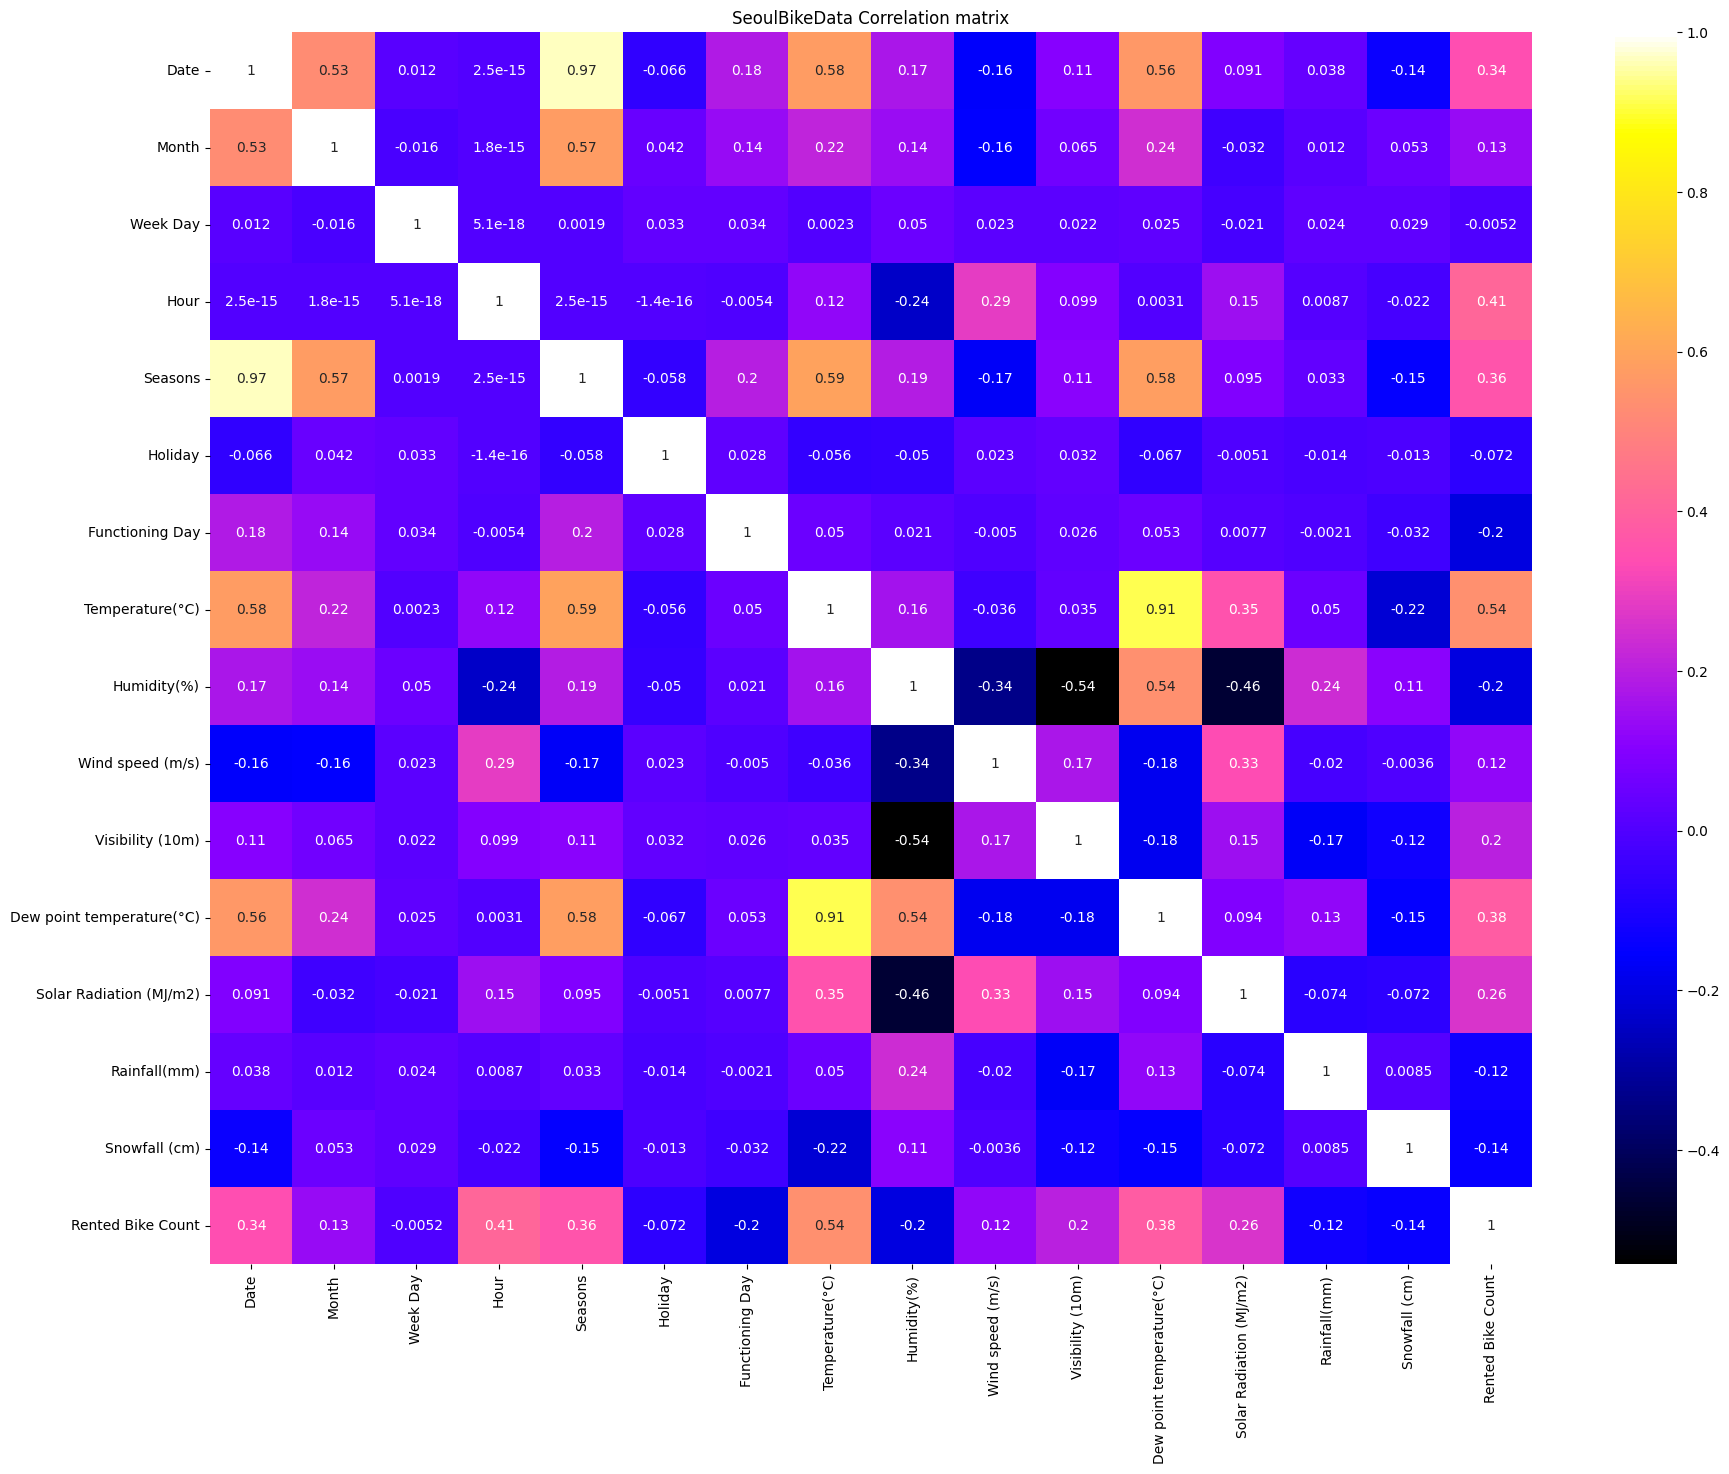

In [57]:
# Generating Correlation matrix of SeoulBikeData
correlation_matrix = SeoulBikeData.corr()

# Plotting Correlation matrix
num_rows, num_cols = SeoulBikeData.shape
plt.figure(figsize=(num_cols + (num_cols / 3), num_cols))
plt.title("SeoulBikeData Correlation matrix")
ax = sns.heatmap(correlation_matrix, annot = True, cmap= 'gnuplot2')
plt.show()

Correlation matrix gives us a value for each pair relationship between the columns of our data set. If we have a positive value, it means that the correlation in linear (both values increase or decrease in the same direction); otherwise, a negative value refers an inverse relation (while a value increases, the other one decreases). The furthest the value is from 0, the most intense the relationship is.
For our target value we can observe that the features with the more responsibility in the results are the ones related to the seasons, the hour, and temperature. The relationships: Dew point temperature and Temperature, Dew point temperature and Date, and Dew Point Temperature and Temperature seem to be the most linearly intense ones, while Visibility and Humidity, and Solar Radiation and Humidity, the most inverse intense.

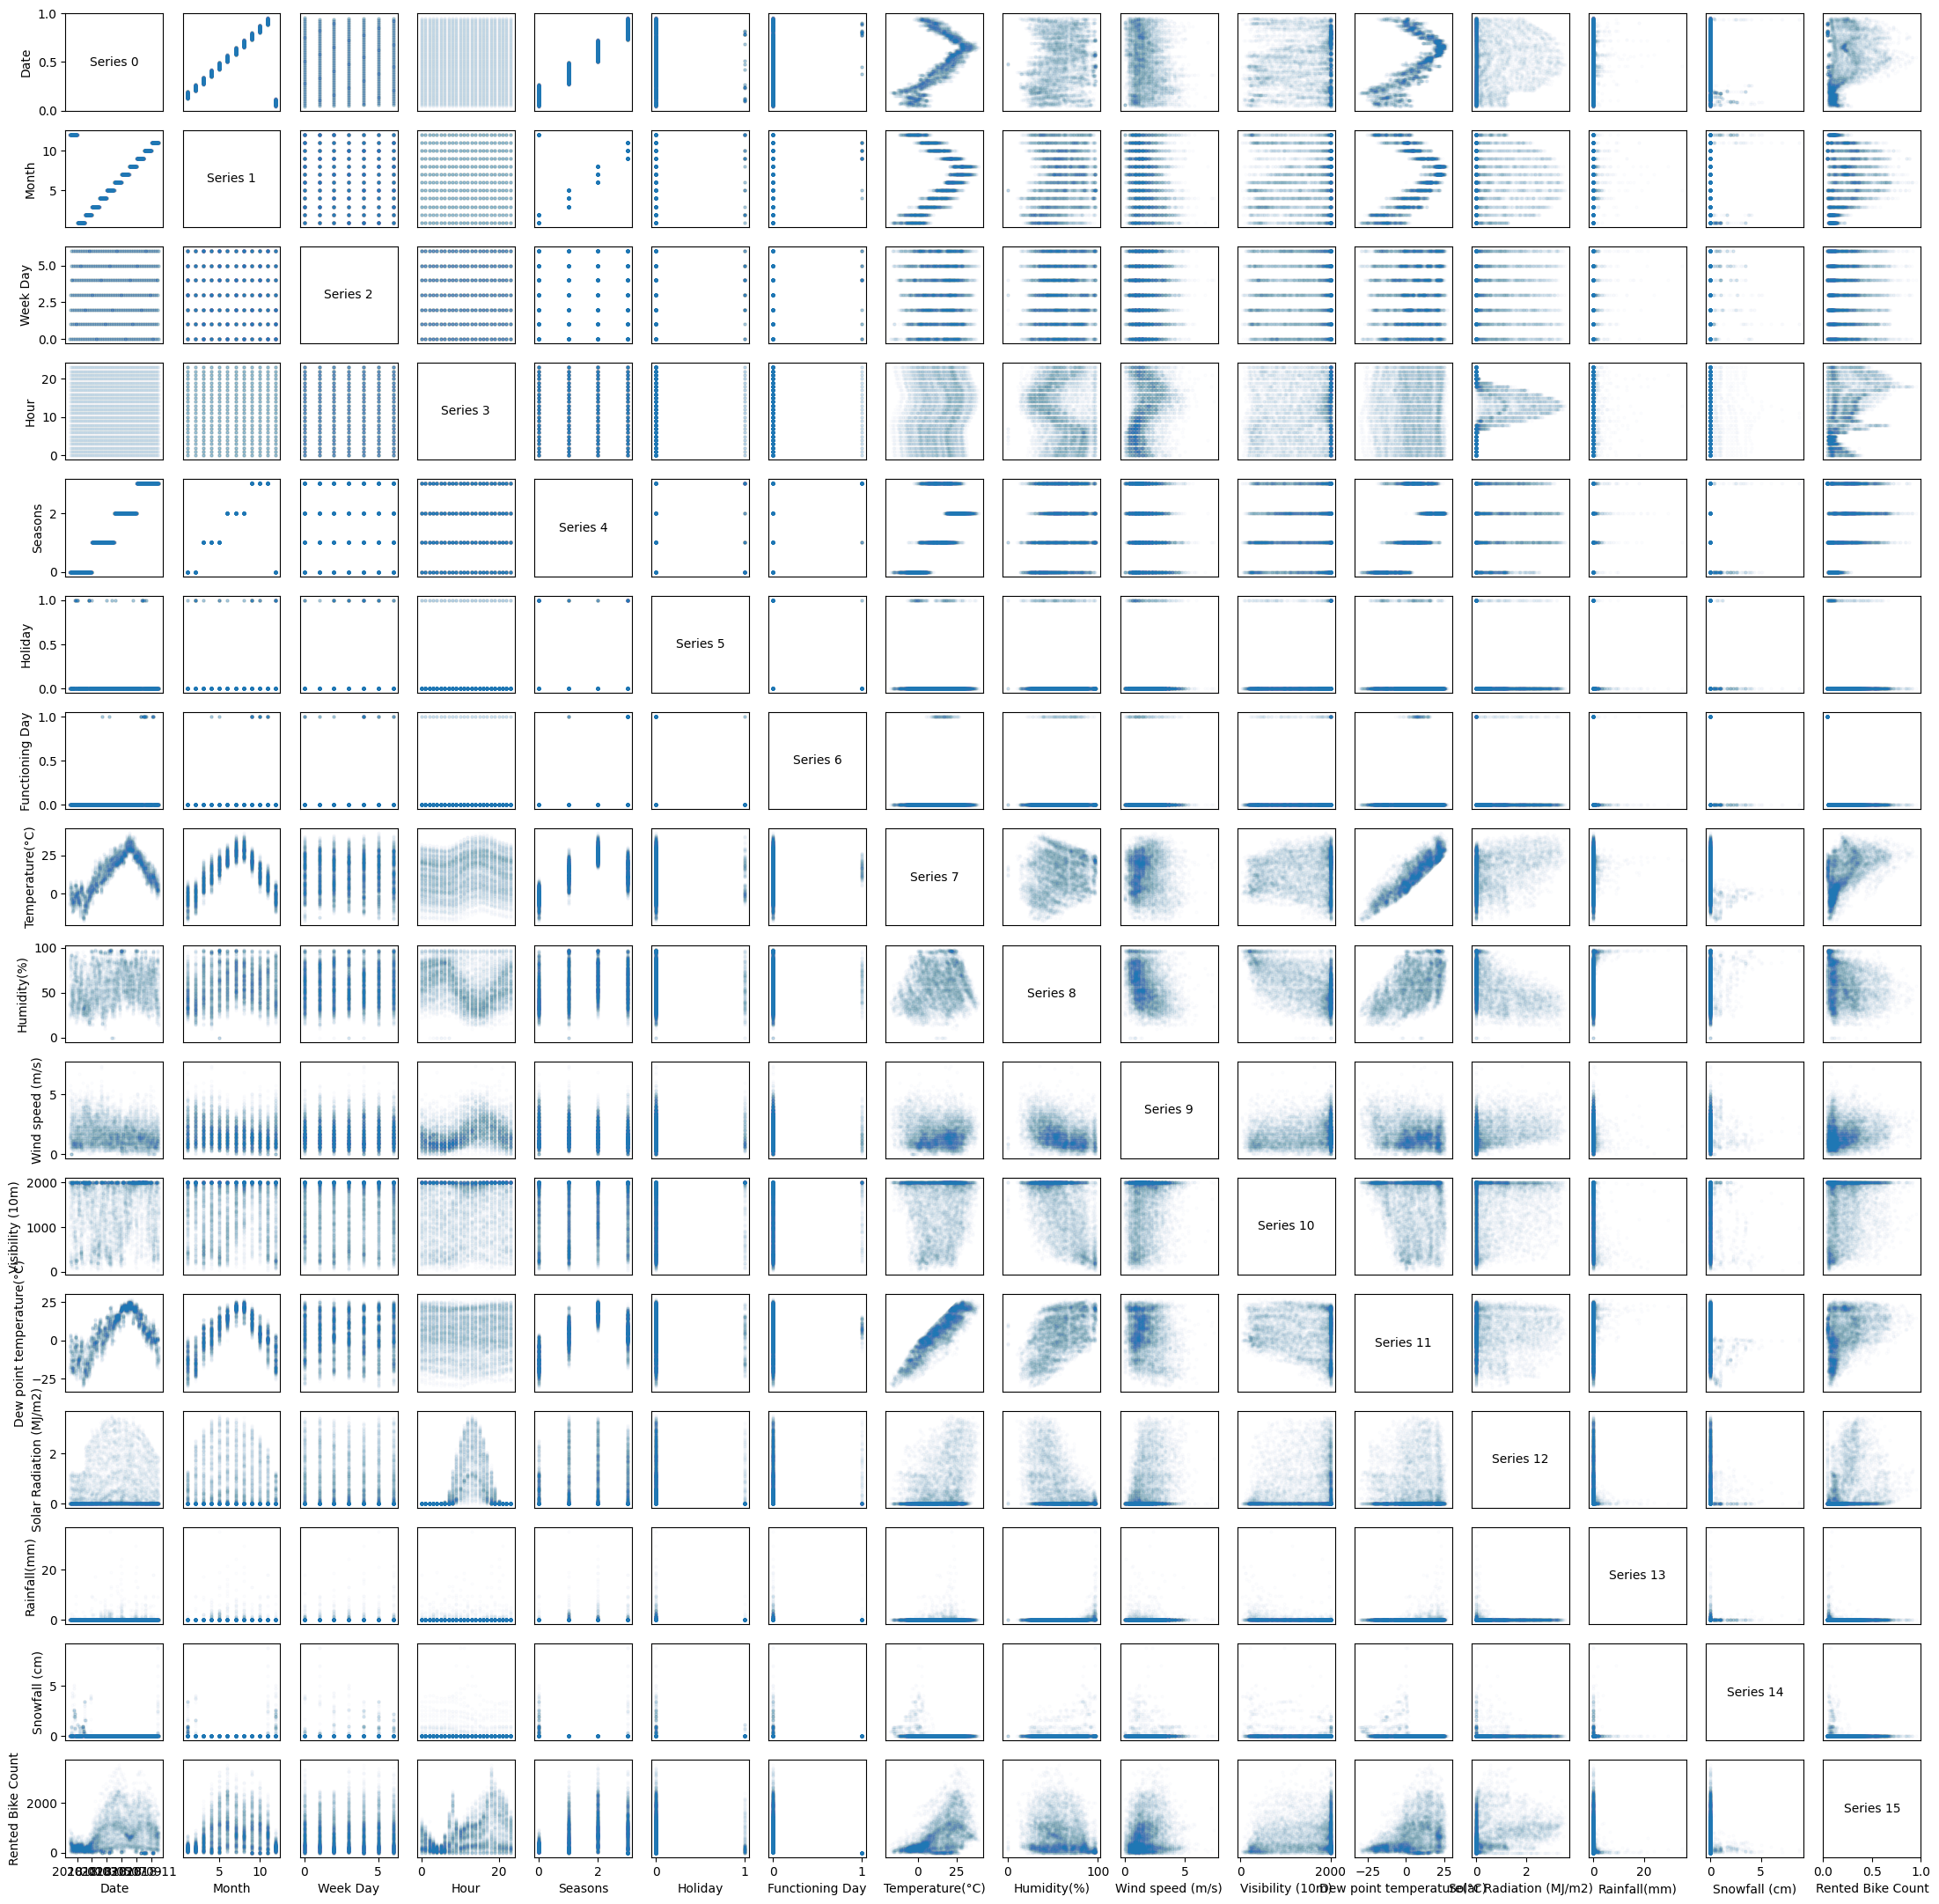

In [58]:
# (? Como interpretar relaciones)
# Function to generate scatterplot matrix
def scatterplot_matrix(data):
    num_col = data.shape[1]

    fig, axs = plt.subplots(num_col, num_col, figsize=(num_col * 1.7, num_col * 1.7))
    
    for i, col_name_i in zip(range(num_col), data.columns):
        for j, col_name_j in zip(range(num_col), data.columns):
            # Either plot scatter or print number of serie
            if i != j: axs[i, j].scatter(data[col_name_j], data[col_name_i], s = 5, alpha=0.01)
            else: axs[i, j].annotate(f"Series {i}", (0.5, 0.5), xycoords='axes fraction', ha="center", va="center")

            # Setting rows and columns shared labels
            if j == 0: axs[i, j].set_ylabel(col_name_i)
            if i == num_col - 1: axs[i, j].set_xlabel(col_name_j)

            # Hide axis labels except for left and bottom charts
            if i < num_col - 1: axs[i][j].xaxis.set_visible(False)
            if j > 0: axs[i][j].yaxis.set_visible(False)

    return fig

# Plotting scatterplot matrix
scatter_matrix = scatterplot_matrix(SeoulBikeData)
plt.show()

(?) No se exactamente que informacion podriamos sacar de aqui

**Pregunta para tutoring: que podemos analisar de aqui?**

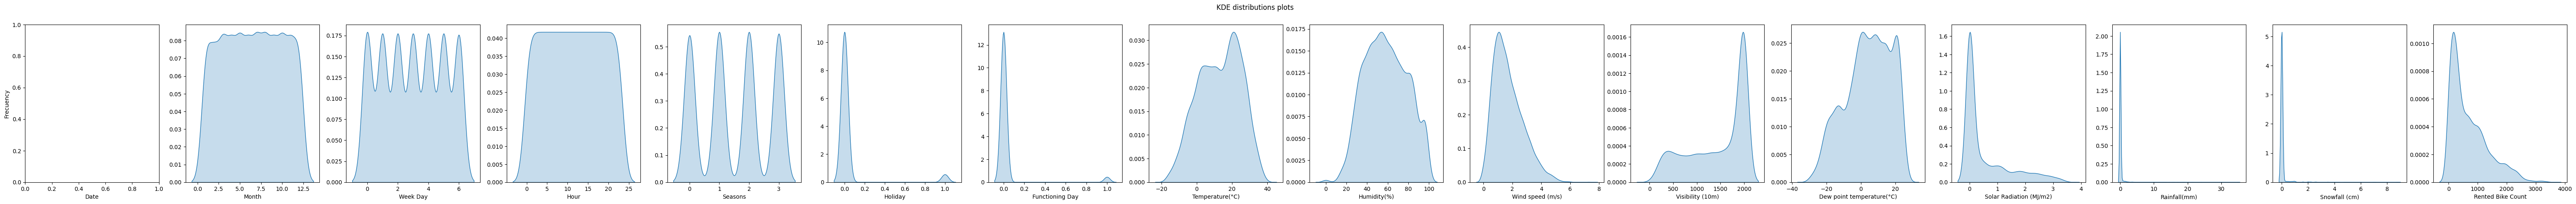

In [59]:
# To surpress annoying warnings
import warnings

# Function to generate KDE plots
def kde_plot(data):
    # Dropping Date column because of unssuported data type
    #data = data.drop(["Date"], axis=1)

    # Number of features
    num_col = data.shape[1]

    # Creating subplots
    fig, axs = plt.subplots(1, num_col, figsize=(num_col * 5, 5))
    
    # Plotting for each feature
    for i, data_col in zip(range(num_col), data.columns):
        warnings.filterwarnings('ignore')
        if(data_col != "Date"):
            sns.kdeplot(data[data_col], ax=axs[i], fill = True)

        # Setting rows and columns shared labels
        if i == 0: axs[i].set_ylabel("Frecuency")
        else: axs[i].set_ylabel("")
        axs[i].set_xlabel(data_col)
        
    return fig

# Plotting Kde
kde_plotted = kde_plot(SeoulBikeData)
plt.suptitle("KDE distributions plots")
plt.show()

The KDE plot show us the distributions of each column in our data set. It is important to check possible skews and/or outliers. 
As we predict previously, there are some features with huge skews, which are not desirable for our prediction model. The most obvious skewed features are:
- Holiday: Right skewed
- Functioning Day: Right skewed
- Wind Speed: Right skewed
- Visibility: Left skewed
- Dew point temperature: Left skewed
- Solar Radiation (MJ/m2): Right skewed
- Rainfall(mm): Right skewed
- Snowfall (cm): Right skewed
- Rented Bike Count: Right skewed

### Miscellaneous of functions for additional dataset exploration

We include some functions that are less informative but proposed to be used if needed.

In [60]:
def barplots_subplot(data, data_cols):
    '''
    Generate a subplot of barplot for the specified columns of a dataset

    @param data: pandas dataframe dataset
    @param data_cols: list of columns names from dataset to include in sublplot

    @return: Figure object containing subplot
    '''

    # Number of features
    num_col = len(data_cols)

    # Creating subplots
    fig, axs = plt.subplots(1, num_col, figsize=(num_col * 5, 5))
    
    # Plotting for each feature
    for i, data_col in zip(range(num_col), data_cols):
        axs[i].bar(data[data_col].unique(), data[data_col].value_counts())

        # Setting rows and columns shared labels
        if i == 0: axs[i].set_ylabel("Frecuency")
        axs[i].set_xlabel(data_col)
        
    return fig

def histograms_subplot(data, data_cols, n_bins):
    '''
    Generate a subplot of histograms for the specified columns of a dataset

    @param data: pandas dataframe dataset
    @param data_cols: list of columns names from dataset to include in sublplot
    @param n_bins: number of bins for hisogram plots

    @return: Figure object containing subplot
    '''
    # Number of features
    num_col = len(data_cols)

    # Creating subplots
    fig, axs = plt.subplots(1, num_col, figsize=(num_col * 5, 5))
    
    # Plotting for each feature
    for i, data_col in zip(range(num_col), data_cols):
        axs[i].hist(data[data_col], bins = n_bins)

        # Setting rows and columns shared labels
        if i == 0: axs[i].set_ylabel("Frecuency")
        axs[i].set_xlabel(data_col)
        
    return fig

def boxplots_subplot(data, data_cols):
    '''
    Generate a subplot of boxplots for the specified columns of a dataset

    @param data: pandas dataframe dataset
    @param data_cols: list of columns names from dataset to include in sublplot

    @return: Figure object containing subplot
    '''
    # Number of features
    num_col = len(data_cols)

    # Creating subplots
    fig, axs = plt.subplots(1, num_col, figsize=(num_col * 5, 5))
    
    # Plotting for each feature
    for i, col_name_i in zip(range(num_col), data_cols):
        # Heatmap plotting
        sns.boxplot(ax=axs[i], x=col_name_i, y = 'Rented Bike Count', data = data)
        

        # Setting rows and columns shared labels
        if i == 0: axs[i].set_ylabel('Rented Bike Count')
        axs[i].set_xlabel(col_name_i)
        
    return fig

from scipy.ndimage import gaussian_filter

def densities_subplot(data_features, data_target, s, bins = 1000):
    '''
    Generate a subplot of feature vs target density map for the specified columns of a dataset

    @param data_features: pandas dataframe containing the features to consider for plotting
    @param data_target: pandas serie containing target variable
    @param s: sigma value to consider for gaussian deviation calculation
    @param bins: number of bins to consider for density map

    @return: Figure object containing subplot
    '''
    # Number of features
    num_col = data_features.shape[1]

    # Creating subplots
    fig, axs = plt.subplots(1, num_col, figsize=(num_col * 5, 5))
    
    # Plotting for each feature
    for i, col_name_i in zip(range(num_col), data_features.columns):
        # Heatmap plotting
        heatmap, x, y = np.histogram2d(data_features[col_name_i], data_target, bins = bins)
        heatmap = gaussian_filter(heatmap, sigma = s)
        axs[i].imshow(heatmap.T, origin='lower', cmap = 'gnuplot2')
        axs[i].axes.yaxis.set_ticks([])
        axs[i].axes.xaxis.set_ticks([])

        # Setting rows and columns shared labels
        if i == 0: axs[i].set_ylabel(data_target.name)
        axs[i].set_xlabel(col_name_i)
    return fig

def joint_matrix(data):
    '''
    Plot a joint matrix from the given data

    @param data: pandas dataframe dataset
    '''
    num_col = data.shape[1]
    
    for i, col_name_i in zip(range(num_col), data.columns):
        for j, col_name_j in zip(range(num_col), data.columns):
            # Plotting individual jointplots
            if i != j: sns.jointplot(x = col_name_i, y = col_name_j, data = data, kind = 'hex')


In [61]:
# Lists for feature type
discrete_features = ['Month', 'Week Day','Hour','Seasons', 'Holiday', 'Functioning Day']
continuous_features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

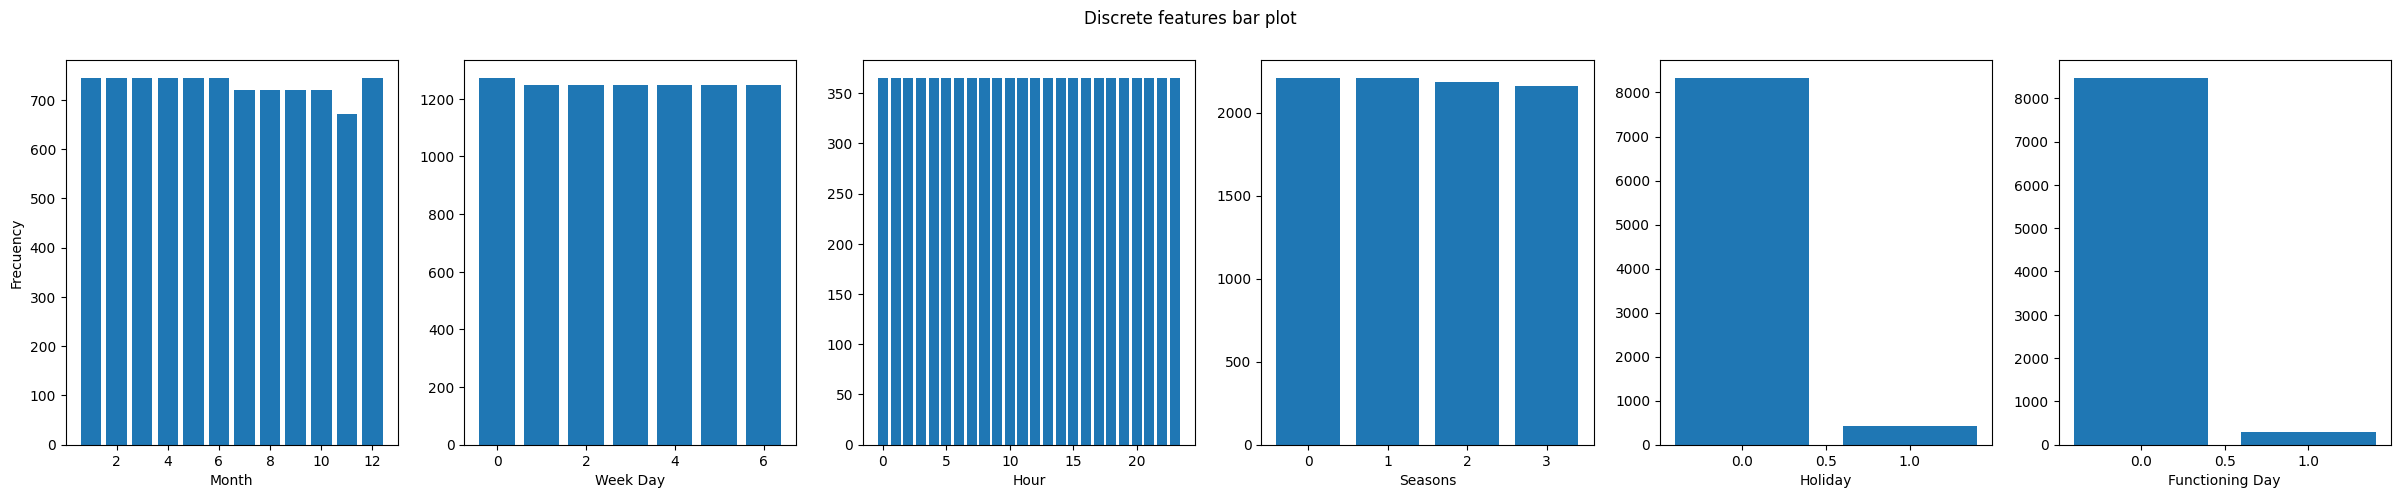

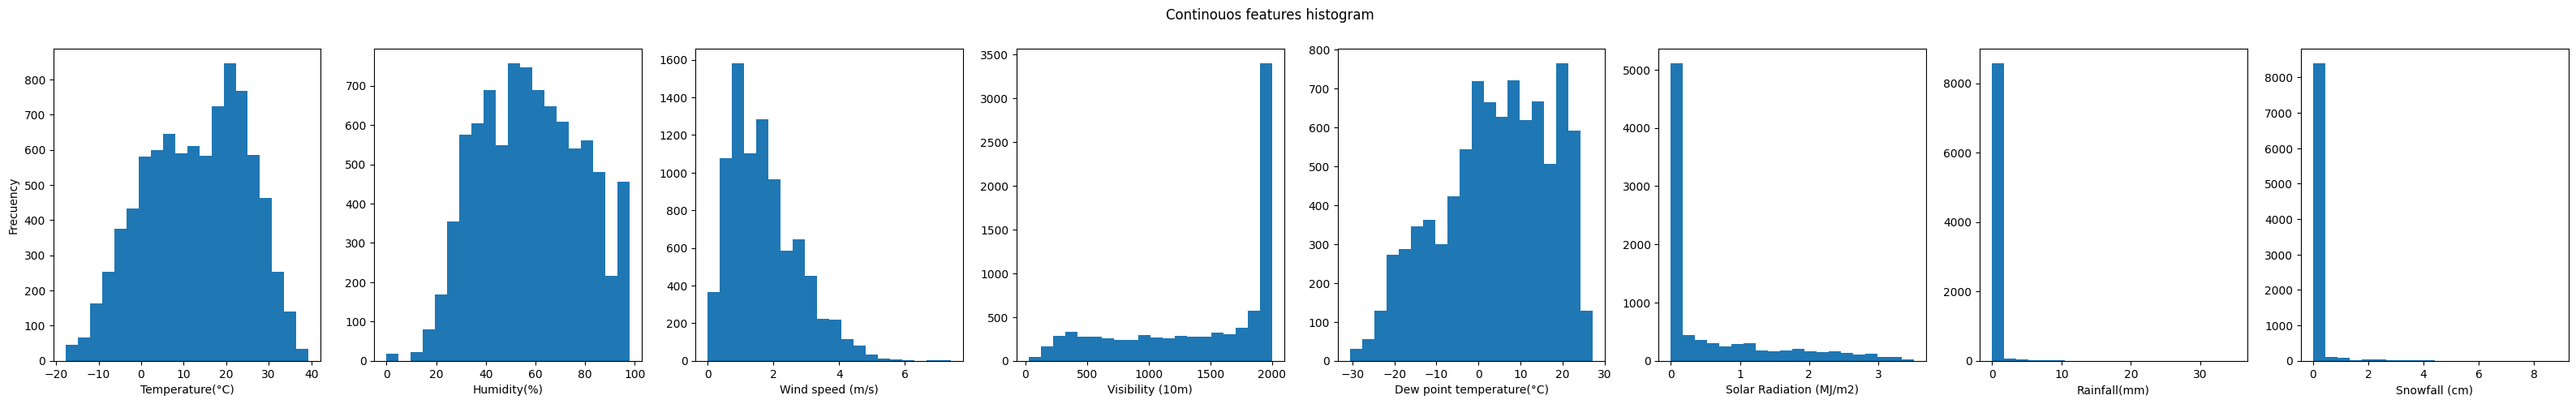

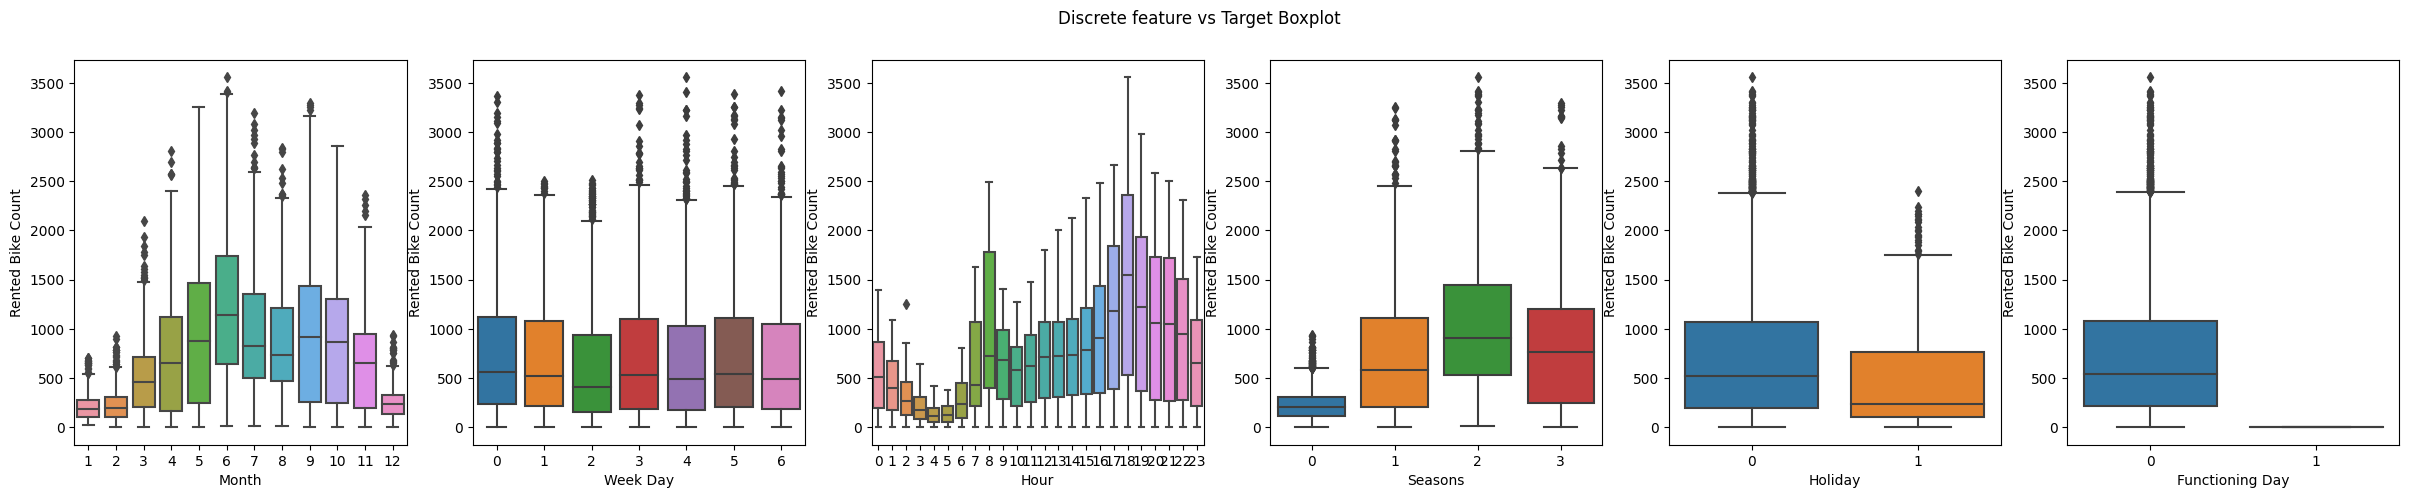

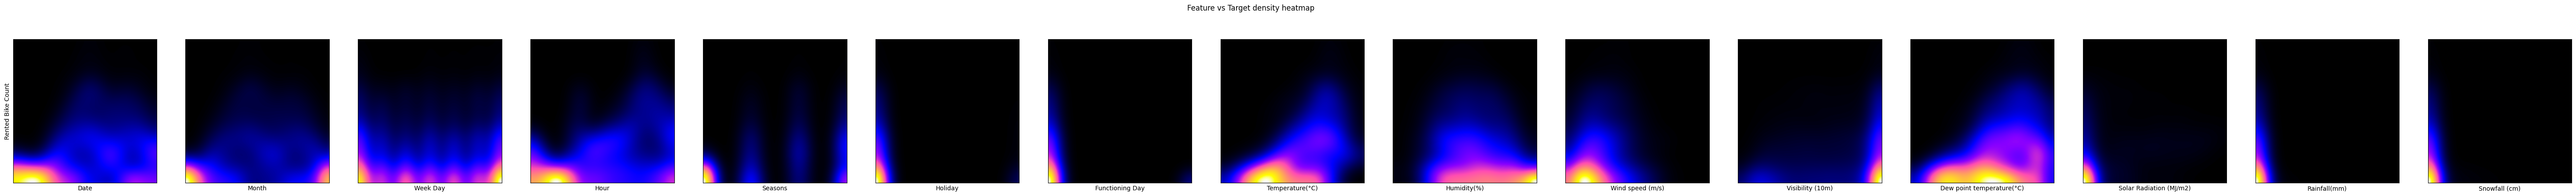

In [62]:
# Plotting barplot
discrete_barplot = barplots_subplot(SeoulBikeData, discrete_features)
plt.suptitle("Discrete features bar plot")
plt.show()

# Plotting histogram
continuous_histogram = histograms_subplot(SeoulBikeData, continuous_features, 20)
plt.suptitle("Continouos features histogram")
plt.show()

# Plotting discrete features boxplot
discrete_box = boxplots_subplot(SeoulBikeData, discrete_features)
plt.suptitle("Discrete feature vs Target Boxplot")
plt.show()

# Plotting features vs target heatmaps
features_target = densities_subplot(SeoulBikeData.drop('Rented Bike Count', axis=1), SeoulBikeData['Rented Bike Count'], 64)
plt.suptitle("Feature vs Target density heatmap")
plt.show()

## Further dataset transformation

From now on, since we already have the most important information from date feature represented as month and week day, we can drop Date feature from dataset.

In [63]:
SeoulBikeData = SeoulBikeData.drop('Date', axis=1)

### Balancing features

As previously said, we should balance our features to achieve better results in our implementation. We implement skew() method to have a metric which tell us the instensity of the unbalance (the furthest the value from 0, the bigger the intensity), and its orientation (a positive value refers to right skewed feature, as well as a negative value refers to left skew)

In [64]:
skew_features = SeoulBikeData.skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_features})
print(skewness)

                                Skew
Rainfall(mm)               14.533232
Snowfall (cm)               8.440801
Functioning Day             5.170969
Holiday                     4.163603
Solar Radiation (MJ/m2)     1.504040
Rented Bike Count           1.153428
Wind speed (m/s)            0.890955
Humidity(%)                 0.059579
Week Day                    0.003109
Hour                        0.000000
Seasons                    -0.004382
Month                      -0.010458
Temperature(°C)            -0.198326
Dew point temperature(°C)  -0.367298
Visibility (10m)           -0.701786


Our suspicions were correct, now we are totally sure that we need to balance our features in some way.

To achieve the balance we choose Yeo-Johnson transformation, since it can handle negative and positive values (which is important for us since our dataset do contains both of them). It works by *INCLUDE METHOD'S DESCRIPTION*. It is not a bad idea to apply the transformation to all our features, even if not all of them have big unbalances.

In [65]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
pt.fit(SeoulBikeData)
SeoulBikeData = pd.DataFrame(pt.transform(SeoulBikeData), columns=SeoulBikeData.columns)

skew_features = SeoulBikeData.skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_features})
print(skewness)

                               Skew
Functioning Day            5.170969
Holiday                    4.163603
Snowfall (cm)              4.103148
Rainfall(mm)               3.713710
Solar Radiation (MJ/m2)    0.563062
Wind speed (m/s)           0.000858
Humidity(%)               -0.068317
Dew point temperature(°C) -0.124635
Rented Bike Count         -0.127438
Seasons                   -0.161645
Month                     -0.170873
Week Day                  -0.192835
Temperature(°C)           -0.234084
Hour                      -0.241479
Visibility (10m)          -0.520803


We can see that the skews have been strongly reduced, hopefully, improving our models predictions.

### Normalization

*EXPLICAR NORMALIZACION*
Since it is not necessary to normalize the target value and we can save some time by not reconverting the predictions obtained to the original results space, we will separate the columns from our dataset into those that are features and the target value. To achieve it, we simply create two lists (one for each of this subgroups) containing the names of the columns so we can simply call them when needed.

In [66]:
X = ['Month',
     'Week Day',
     'Hour',
     'Seasons',
     'Holiday',
     'Functioning Day',
     'Temperature(°C)',
     'Humidity(%)',
     'Wind speed (m/s)',
     'Visibility (10m)',
     'Dew point temperature(°C)',
     'Solar Radiation (MJ/m2)',
     'Rainfall(mm)',
     'Snowfall (cm)']

y = ['Rented Bike Count']

For normalization transformation, we wanted to reduce the range of our feature values from 0 to 1, then we choose MinMax normalization *EXPLICAR MINMAX*.

In [67]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(SeoulBikeData[X])

X_norm = norm.transform(SeoulBikeData[X])

X_norm = pd.DataFrame(X_norm, columns=X)

X_norm.describe()

,Month,Week Day,Hour,Seasons,Holiday,Functioning Day,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,0.535128,0.534497,0.555757,0.525529,0.049315,0.033676,0.546293,0.639109,0.441811,0.660916,0.548499,0.332348,0.059154,0.050521
std,0.310335,0.331401,0.292065,0.371147,0.216537,0.180404,0.206940,0.192307,0.175853,0.346656,0.233313,0.392980,0.233956,0.218922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.322245,0.213717,0.331839,0.385764,0.000000,0.000000,0.385959,0.489252,0.304970,0.339695,0.377852,0.000000,0.000000,0.000000
50%,0.595856,0.562691,0.581336,0.710083,0.000000,0.000000,0.562105,0.633539,0.434469,0.791536,0.548531,0.020835,0.000000,0.000000
75%,0.844114,0.861799,0.799920,0.710083,0.000000,0.000000,0.712681,0.789558,0.564933,1.000000,0.741896,0.770881,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now we can easily see how the transformation was correctly made, as well as we confirm that the balance of the features was correctly made by the same arguments we identified the unbalance.

## Models testing

For model test phase, we need to split our data set into training, testing and validation data. Since our dataset is not very big, we want to give the biggest possible amount of regists for training, then we split in 60, 20, 20 percentage ratio respectivley.

**Pregunta para tutoring: Para que o cuando usamos el validation?**

In [68]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and temporary (validation + test) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_norm, SeoulBikeData[y], test_size=0.4, random_state=12)

# Splitting the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=12)

*PARA CADA MODELO EXPLICAR EL MODELO Y DAR UN ANALISIS DE LAS METRICAS*

In [69]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

prediction = regr.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.2908873930924043
R-squared: 0.7135717045112975


In [70]:
# ESTE NO ES POLINOMIAL: SUSTITUIR POR REGRESION POLINOMIAL
from sklearn.linear_model import LinearRegression

#Let's try with a different model and see if we can improve the results
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.2908873930924043
R-squared: 0.7135717045112975


In [71]:
#RANDOM FOREST REGRESSION
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

# Instantiate the model
rf_model = RandomForestRegressor(random_state=42)

# Train the model using the training sets
rf_model.fit(X_train, y_train)

# Make predictions
rf_prediction = rf_model.predict(X_val)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_val, rf_prediction)
rf_r2 = r2_score(y_val, rf_prediction)

print(f"Random Forest Mean Squared Error: {rf_mse}")
print(f"Random Forest R-squared: {rf_r2}")

''' NOT WORKING BEACUSE OF y_val RECHECK
# Scatter plot for Random Forest predictions vs. actual values with a diagonal line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=rf_prediction, alpha=0.7)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Random Forest Model: Actual vs. Predicted')
plt.show()
'''

# Define a threshold
threshold = 100  # You can adjust this threshold based on your problem

# Convert predictions to binary values based on the threshold
rf_prediction_binary = (rf_prediction >= threshold).astype(int)
y_val_binary = (y_val >= threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_val_binary, rf_prediction_binary)

print(f"Accuracy: {accuracy}")

Random Forest Mean Squared Error: 0.0754546625644453
Random Forest R-squared: 0.9257020039430041
Accuracy: 1.0


In [72]:
#LASSO REGRESSION
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Instantiate the Lasso Regression model
lasso_model = Lasso(alpha=0.01)  # You can adjust the alpha parameter for regularization

# Train the model using the training sets
lasso_model.fit(X_train, y_train)

# Make predictions
lasso_prediction = lasso_model.predict(X_val)

# Evaluate the Lasso Regression model
lasso_mse = mean_squared_error(y_val, lasso_prediction)
lasso_r2 = r2_score(y_val, lasso_prediction)

print(f"Lasso Regression Mean Squared Error: {lasso_mse}")
print(f"Lasso Regression R-squared: {lasso_r2}")

''' NOT WORKING BEACUSE OF y_val RECHECK
# Plot predictions vs. actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=lasso_prediction, alpha=0.7)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Lasso Regression Model: Actual vs. Predicted')
plt.show()
'''

# Define a threshold
threshold = 100  # You can adjust this threshold based on your problem

# Convert predictions to binary values based on the threshold
lasso_prediction_binary = (lasso_prediction >= threshold).astype(int)
y_val_binary = (y_val >= threshold).astype(int)

# Calculate accuracy
lasso_accuracy = accuracy_score(y_val_binary, lasso_prediction_binary)

print(f"Lasso Regression Accuracy: {lasso_accuracy}")

Lasso Regression Mean Squared Error: 0.31024368505646216
Lasso Regression R-squared: 0.6945121307865414
Lasso Regression Accuracy: 1.0
